# Importing required libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Reading input data for House Price Prediction.

In [11]:
data = pd.read_csv('USA_Housing.csv')

In [12]:
data.shape

(5000, 7)

In [13]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Describing our data

In [14]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Checking the Null Value

In [16]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Scaling our data

In [23]:
scaler = StandardScaler()
X=data.drop(['Price','Address'],axis=1)
y=data['Price']
cols = X.columns
X = scaler.fit_transform(X)

# Splitting our data for training and test purposes.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Linear Regression model for House Price Prediction.

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Ypred = regressor.predict(X_test)
r2_score(y_test,Ypred)

0.9179971706834331

<AxesSubplot:xlabel='Price'>

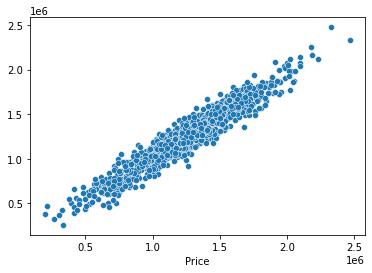

In [73]:
sns.scatterplot(x=y_test, y=pred)

<AxesSubplot:xlabel='Price', ylabel='Count'>

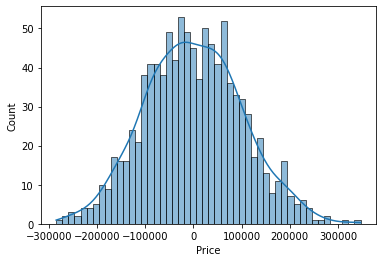

In [74]:
sns.histplot((y_test-pred),bins=50,kde=True)

In [39]:
result = pd.DataFrame({'ActualPrice': y_test, 'PredictedPrice': pred})
(result.head())

,ActualPrice,PredictedPrice
1501,1.339096e+06,1.308588e+06
2586,1.251794e+06,1.237037e+06
2653,1.340095e+06,1.243429e+06
1055,1.431508e+06,1.228900e+06
705,1.042374e+06,1.063321e+06


In [42]:
i = float(input('Enter Average Area Income: '))
a = float(input('Enter Average Area House Age: '))
r = float(input('Enter Average Area Number of Rooms: '))
br = float(input('Enter Average Area Number of Bedrooms: '))
p = float(input('Enter Average Area Population: '))
print('The predicted House Price is:',round(float(regressor.predict([[i,a,r,br,p]])[0]),2))

Enter Average Area Income: 20000
Enter Average Area House Age: 450
Enter Average Area Number of Rooms: 5
Enter Average Area Number of Bedrooms: 2
Enter Average Area Population: 4000
The predicted House Price is: 5296428384.81
